In [2]:
import csv
import numpy as np
from typing import Set,Tuple, List
import torch
import torch.utils
import torch.utils.data
import torch.nn as nn
import torchvision
NoneType = type(None)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image
import torchvision.transforms.functional as TF
from torchvision.models import vgg11
from torchvision.models import mobilenet_v2
import torchvision.transforms as transforms
import time
import os
import csv
import unittest


<h1 id="exercise-1"><strong>Exercise 1 Solution</strong></h1>


## Problems Identified

The problem described in the exercise arises from the nature of the **`Set`** data type in Python and how indexing is approached.

1. **Reason for Incorrect Results**:
    - Sets in Python are unordered collections of unique elements. This means that the elements in a set do not have a fixed order, and thus, they cannot be accessed by an index as we would in a list or an array.
    - When the exercise attempts to access elements in a set using an index (like **`fruit_id`**), it will not work as expected because sets do not support indexing or slicing.
2. **Solution**:
    - To fix this issue, we need to convert the set to a data type that supports indexing. The most straightforward approach is to convert the set to a list.
    - This conversion will order the elements in some consistent but arbitrary order, allowing us to use indexing. However, it's important to note that the order of elements in a set when converted to a list is not guaranteed to be the same every time, especially if the set elements change.
  
Here's a revised version of the function:

In [26]:
def id_to_fruit(fruit_id: int, fruits: set) -> str:
    """
    Fetches a fruit's name by index from an unordered set of fruit names.

    Since sets do not support direct indexing due to their unordered nature, this function
    first transforms the set into a list. This list conversion allows for ordered access
    by indices. If the given index, fruit_id, falls outside the range of the newly created list,
    the function will signal an error by raising an IndexError. This approach ensures that
    users of the function are made aware of incorrect index usage immediately.

    Parameters:
    - fruit_id: Index intended to retrieve the corresponding fruit name.
    - fruits: A collection of unique fruit names.

    Returns:
    - A string representing the name of the fruit associated with the provided index.

    Raises:
    - IndexError: Triggered if fruit_id does not correspond to a valid position within the list,
                  which can occur if the index is negative or exceeds the collection's bounds.
    """
    
    # Transformation: Set to List for Index-based Access
    fruits_list = list(fruits)
    
    print("Fruits list after transformation:", fruits_list)
    
    # Validity Check: Ensuring the fruit_id is within the permissible range
    if fruit_id < 0 or fruit_id >= len(fruits_list):
        # Error Handling: Index out of range
        raise IndexError("fruit_id is out of range")
    
    # Successful Retrieval: Fetch and return the fruit name at the desired index
    return fruits_list[fruit_id]


In [36]:
name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})
name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "strawberry"})

Fruits list after transformation: ['strawberry', 'kiwi', 'orange', 'melon', 'apple']
Fruits list after transformation: ['strawberry', 'kiwi', 'orange', 'melon', 'apple']
Fruits list after transformation: ['strawberry', 'kiwi', 'orange', 'melon', 'apple']


In [40]:
# Print the results
print("Fruit at index 1:", name1)
print("Fruit at index 3:", name3)
print("Fruit at index 4:", name4)

Fruit at index 1: kiwi
Fruit at index 3: melon
Fruit at index 4: apple


## Unit Test

Here are some test cases to consider:

1. **Test with a Valid Index**: Verify that the function returns the correct fruit name when provided with a valid index.
2. **Test with an Index Out of Bounds**: Verify that the function raises a **`ValueError`** when provided with an index that is out of the range of the fruits list length.
3. **Test with an Empty Set**: Verify how the function behaves when an empty set is passed.
4. **Test Negative Index**: Since negative indices are not supported in the context of this function's design, ensure it raises a **`ValueError`**.

In [38]:
class TestIdToFruitFunction(unittest.TestCase):
    # Test case to check if the function returns the correct fruit name for a valid index.
    # This test relies on the conversion of a set to a list, which may not guarantee
    # the same order across different executions or environments. Thus, the expected
    # fruit might need adjustment depending on the order in which the set is converted to a list.
    def test_valid_index(self):
        fruits = {"apple", "orange", "melon", "kiwi", "strawberry"}
        # Convert the set to a list and select the fruit at index 1 for the expected result.
        expected_fruit = list(fruits)[1]  # Note: Order of elements in list conversion is arbitrary.
        self.assertEqual(id_to_fruit(1, fruits), expected_fruit)

    # Test case to verify that an IndexError is raised when an index outside the valid range is used.
    # This ensures the function correctly handles requests for non-existent elements, reflecting
    # proper error handling for out-of-bounds indices.
    def test_index_out_of_bounds(self):
        fruits = {"apple", "orange", "melon"}
        # Expect an IndexError when attempting to access an index beyond the available items.
        with self.assertRaises(IndexError):
            id_to_fruit(3, fruits)

    # Test case to ensure the function raises an IndexError when attempting to access an element
    # in an empty set. This test verifies the function's robustness in handling edge cases where
    # the input set contains no elements.
    def test_empty_set(self):
        fruits = set()
        # An empty set should lead to an IndexError, as no indices are valid in this context.
        with self.assertRaises(IndexError):
            id_to_fruit(0, fruits)

    # Test case to check the function's response to negative indices, which are not supported.
    # This verifies that the function properly handles invalid input by raising an IndexError,
    # aligning with Python's typical behavior for negative indexing in lists (which is not applicable here).
    def test_negative_index(self):
        fruits = {"apple", "orange", "melon"}
        # Negative indices should trigger an IndexError, indicating invalid input.
        with self.assertRaises(IndexError):
            id_to_fruit(-1, fruits)


In [58]:
unittest.main(argv=['', 'TestIdToFruitFunction'], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


Fruits list after transformation: []
Fruits list after transformation: ['orange', 'melon', 'apple']
Fruits list after transformation: ['orange', 'melon', 'apple']
Fruits list after transformation: ['strawberry', 'kiwi', 'orange', 'melon', 'apple']


-----------------------

<h1 id="exercise-2"><strong>Exercise 2 - Solution</strong></h1>


Let's analyze the issues based on the given description and code:

## Obvious Error

The line **`coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 1], coords[:, 3], coords[:, 2]`** has an error in assignment. Specifically, both **`coords[:, 0]`** and **`coords[:, 2]`** (which represent **`x11`** and **`x12`** respectively) are assigned **`coords[:, 1]`** and **`coords[:, 3]`** values, but **`coords[:, 1]`** is assigned twice, meaning that **`y11`** and **`y12`** will end up with the same value after the swap, which is incorrect.

## Fixing the Error

The corrected line should ensure that x and y coordinates are swapped correctly. The original assignment mistakenly assigns the y11 value to both **`x11`** and **`x12`**. Instead, it should correctly assign **`y11`** to **`x11`** and **`y12`** to **`x12`**, and vice versa for the **`x`** to **`y`** assignments.
Here's how the fixed code would look:

In [48]:
def swap(coords: np.ndarray):
    # Correctly flip x and y coordinates without altering the class id
    coords[:, [0, 2]] = coords[:, [1, 3]]
    coords[:, [1, 3]] = coords[:, [0, 2]].copy()
    return coords


However, the above fix still contains a logical mistake in the approach to swapping values because it immediately overwrites the original x values (**`coords[:, 0]`** and **`coords[:, 2]`**) with y values before they can be used to update the y positions. This results in both sets of coordinates being the same.

The correct and efficient way to swap the x and y coordinates without losing the original values would involve the use of a temporary variable or performing the swap in a manner that doesn't immediately overwrite the original values. Here is a corrected approach:

In [69]:
def swap(coords: np.ndarray):
    """
    Flips the x and y coordinates in the coords array.
    
    :param coords: A numpy array of bounding box coordinates.
    """
    # Temporarily store x coordinates
    temp_x = coords[:, [0, 2]].copy()
    # Swap x11 with y11 and x12 with y12
    coords[:, [0, 2]] = coords[:, [1, 3]]
    coords[:, [1, 3]] = temp_x
    return coords


In [70]:
# Sample input coordinates
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])

print("Original Coordinates:")
print(coords)

# Run the swap function
swapped_coords = swap(coords.copy())  # Use copy to preserve the original for comparison

print("\nSwapped Coordinates:")
print(swapped_coords)


Original Coordinates:
[[10  5 15  6  0]
 [11  3 13  6  0]
 [ 5  3 13  6  1]
 [ 4  4 13  6  1]
 [ 6  5 13 16  1]]

Swapped Coordinates:
[[ 5 10  6 15  0]
 [ 3 11  6 13  0]
 [ 3  5  6 13  1]
 [ 4  4  6 13  1]
 [ 5  6 16 13  1]]


## Unit Test

- **Setting up the Test**: The **`TestSwapFunction`** class inherits from **`unittest.TestCase`**, providing a framework for writing the test.
- **Test Method**: The **`test_swap`** method creates an **`input_coords`** array representing bounding boxes, where each row contains **`[x11, y11, x12, y12, classid]`**. It defines **`expected_output`** with the x and y coordinates swapped accordingly.
- **Assertion**: **`np.testing.assert_array_equal`** is used to assert that the actual output from the **`swap`** function matches the expected output. This method is useful for comparing numpy arrays.

In [71]:
class TestSwapFunction(unittest.TestCase):
    def test_swap(self):
        # Define a sample array of bounding box coordinates
        input_coords = np.array([
            [10, 5, 15, 6, 0],
            [11, 3, 13, 6, 0],
            [5, 3, 13, 6, 1],
            [4, 4, 13, 6, 1],
            [6, 5, 13, 16, 1]
        ])
        # Expected output after swapping
        expected_output = np.array([
            [5, 10, 6, 15, 0],
            [3, 11, 6, 13, 0],
            [3, 5, 6, 13, 1],
            [4, 4, 6, 13, 1],
            [5, 6, 16, 13, 1]
        ])
        
        # Run the swap function
        output_coords = swap(input_coords.copy())  # Use copy to avoid modifying the original during the test
        
        # Verify that the output matches the expected output
        np.testing.assert_array_equal(output_coords, expected_output)


In [72]:
unittest.main(argv=['', 'TestSwapFunction'], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


--------------

<h1 id="exercise-3"><strong>Exercise 3 - Solution</strong></h1>


## Issues

1. **Data Loading and Conversion Issue**:
    - When loading and parsing the CSV data, the rows are appended to the **`results`** list as strings. The **`np.stack(results)`** call then creates a NumPy array of strings, not floats, which is not suitable for plotting numerical data. This can lead to incorrect plotting behavior because the plot function expects numerical values for both axes.
2. **Incorrect Axes Assignment**:
    - The plotting command **`plt.plot(results[:, 1], results[:, 0])`** plots recall on the x-axis and precision on the y-axis, which is the reverse of the expected behavior described in the docstring. For a precision-recall curve, precision should be on the x-axis, and recall should be on the y-axis.

## How to Fix These Issues

1. **Correct Data Conversion**:
    - Convert the loaded CSV rows to floats before appending them to the **`results`** list or immediately after loading. This ensures that the plotting functions receive the correct numerical data types.
2. **Fix Axes Assignment**:
    - Swap the indices in the **`plt.plot`** function to correctly place precision on the x-axis and recall on the y-axis.

Here is the corrected version of the **`plot_data`** method:

In [73]:
def plot_data(csv_file_path: str):
    """
    Plots a precision-recall curve from data stored in a CSV file.

    The function reads the CSV file specified by `csv_file_path`, where each row contains
    precision and recall values. It then plots these values with precision on the x-axis
    and recall on the y-axis.

    Parameters:
    - csv_file_path: Path to the CSV file containing precision and recall data.

    The CSV file should have a header row with titles 'precision' and 'recall', followed by rows of corresponding values.
    """
    
    # Initialize an empty list to store the read data
    results = []
    
    # Open the CSV file for reading
    with open(csv_file_path) as result_csv:
        # Create a CSV reader object to parse the file
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)  # Skip the header row to start reading data rows
        
        # Loop through each row in the CSV file
        for row in csv_reader:
            # Convert string representations of precision and recall to float and append to results list
            results.append([float(row[0]), float(row[1])])
    
    # Convert the list of results into a NumPy array for easier data manipulation and plotting
    results = np.array(results)
    
    # Plotting the precision-recall curve
    # results[:, 0] accesses all precision values, and results[:, 1] accesses all recall values
    plt.plot(results[:, 0], results[:, 1], marker='o', linestyle='-', color='b')  # Added markers for clarity
    
    # Set the limits for x and y axes to ensure the plot is nicely framed
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    
    # Labeling the axes and setting a title for the plot for better readability
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall Curve')
    
    # Display the plot
    plt.show()


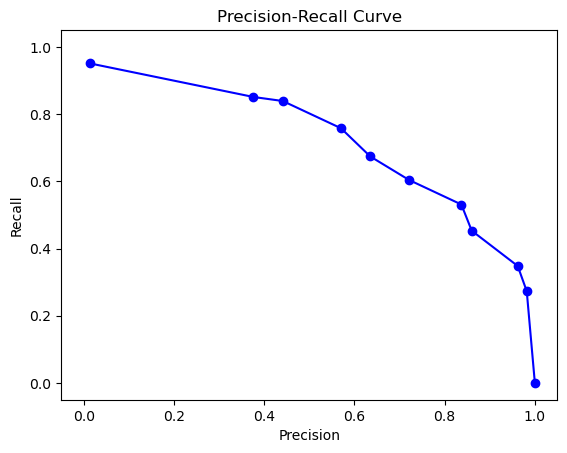

In [74]:
f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')

## Unit Test

- **setUp Method**: Prepares the testing environment by creating a sample CSV file with predefined precision and recall data. This setup mimics the input that the **`plot_data`** function expects.
- **test_plot_data Method**: Executes the core testing logic by calling the **`plot_data`** function with the path to the sample CSV file. The test focuses on the function's ability to process this file without errors, as actual plot visualization cannot be automatically verified in a unit test.
- **tearDown Method**: Cleans up after each test by deleting the sample CSV file, ensuring a clean state for any subsequent tests.
- **Running the Test**: The special invocation **`unittest.main(argv=[''], exit=False)`** allows the unit test to run within a Jupyter Notebook without causing the notebook to exit upon completion.

In [77]:
class TestPlotDataFunction(unittest.TestCase):
    """
    A unit test class for the plot_data function to ensure it properly processes data
    from a CSV file and attempts to plot a precision-recall curve.
    """
    
    def setUp(self):
        """
        Set up the environment before each test.

        This method generates a sample CSV file with precision and recall data that
        the plot_data function will read during testing.
        """
        # Define sample data to write to the CSV
        self.data = [
            ["precision", "recall"],  # Header
            [0.013, 0.951],
            [0.376, 0.851],
            # Additional data rows can be added here
        ]
        self.csv_file_path = "test_data.csv"
        
        # Write the sample data to a CSV file
        with open(self.csv_file_path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(self.data)
    
    def test_plot_data(self):
        """
        Tests the plot_data function's ability to read from a CSV file and process the data.

        This test verifies that the function successfully reads the input data and
        formats it for plotting. Due to the complexity of validating visual output in
        unit tests, this test focuses on the data handling aspect.
        """
        # Directly call the plot_data function. Since the plotting output can't be easily
        # tested in a unit test, this test assumes success if no errors are thrown.
        # In practice, visual inspection would be required to confirm plot correctness.
        plot_data(self.csv_file_path)
        
        # If necessary, additional checks on the data processed by plot_data can be added here,
        # such as mocking plt.plot and verifying it is called with expected arguments.
    
    def tearDown(self):
        """
        Clean up the environment after each test.

        This method removes the sample CSV file generated during setUp to ensure
        the test environment is clean for subsequent tests.
        """
        # Remove the temporary CSV file
        os.remove(self.csv_file_path)


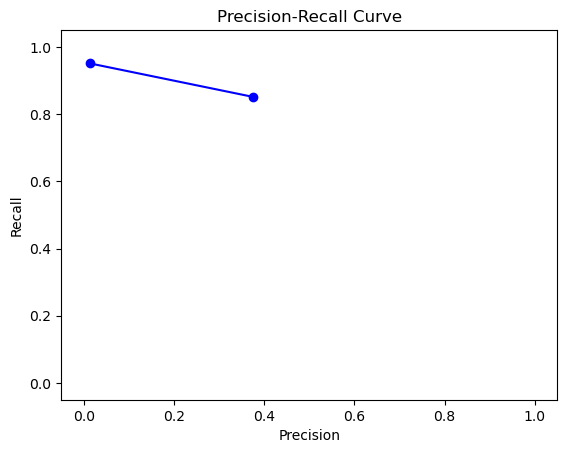

.
----------------------------------------------------------------------
Ran 1 test in 0.180s

OK


In [78]:
# Running the unit test
if __name__ == '__main__':
    unittest.main(argv=['', 'TestPlotDataFunction'], exit=False)

----------------

<h1 id="exercise-4"><strong>Exercise 4 Solution</strong></h1>


## Bugs

### Structural Bug: Batch Size Mismatch

1. **Description**: When the batch size is changed from 32 to 64, an error message indicates a size mismatch between target and input sizes during training. This error typically occurs in the lines where loss functions are computed, specifically due to mismatched dimensions between the discriminator's output and the expected labels size.
    
    **Cause**: The discriminator is designed to process a concatenated array of real and generated samples, effectively doubling the batch size for its input. However, the labels (real_samples_labels and generated_samples_labels) are not adjusted to account for this concatenated input size, leading to a mismatch.
    
    **Solution**: Ensure that the label tensors (**`real_samples_labels`** and **`generated_samples_labels`**) reflect the correct size, especially after concatenating real and generated samples. The size should match the total number of samples fed into the discriminator for each training iteration.
    

### Cosmetic Bug: Image Display

1. **Description**: The cosmetic bug likely relates to the plotting and display of generated images during training.
    
    **Potential Issue**: The display of generated images might not be updating as expected within the training loop. If using Jupyter notebooks or a similar interactive environment, the intended behavior might be to clear the previous plot and display a new one at specified intervals (e.g., at the end of each epoch).
    
    **Solution**: Use **`clear_output(wait=True)`** from IPython.display to clear the previous output (including plotted images) before displaying new images. This ensures that only the latest set of generated images is shown, making the output more concise and relevant.
    

### Corrected Code Snippet

Here's how the structural and cosmetic fixes can be integrated into the **`train_gan`** function:

In [79]:
# Unchanged

class Generator(nn.Module):
    """
    Generator class for the GAN
    """

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

In [80]:
# Unchanged

class Discriminator(nn.Module):
    """
    Discriminator class for the GAN
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [81]:
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):

    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # example data
    real_samples, mnist_labels = next(iter(train_loader))

    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    
    # train - Loop over the dataset multiple times, each loop is an epoch.
    for epoch in range(num_epochs):
        # Enumerate over the data loader to get batches of real images and labels.
        for n, (real_samples, mnist_labels) in enumerate(train_loader):
            # Dynamic adjustment for the batch size, particularly for the last batch that may be smaller.
            current_batch_size = real_samples.size(0)
    
            # Move the real samples to the specified device (GPU or CPU).
            real_samples = real_samples.to(device=device)
            # Create labels for real samples (1s) with the correct batch size.
            real_samples_labels = torch.ones((current_batch_size, 1), device=device)
            
            # Generate latent space samples (random noise) for the generator.
            latent_space_samples = torch.randn((current_batch_size, 100), device=device)
            # Generate fake images from the latent space samples.
            generated_samples = generator(latent_space_samples)
            # Create labels for generated samples (0s) to match the batch size.
            generated_samples_labels = torch.zeros((current_batch_size, 1), device=device)
    
            # Concatenate the real images with the generated images to form a single batch.
            all_samples = torch.cat((real_samples, generated_samples), dim=0)
            # Similarly, concatenate the labels for real and generated images.
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels), dim=0)
    
            # Zero the gradients of the discriminator before the forward pass.
            discriminator.zero_grad()
            # Forward pass the concatenated images through the discriminator.
            output_discriminator = discriminator(all_samples)
            # Calculate the loss for the discriminator based on its output.
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            # Backpropagate the loss for the discriminator and update its weights.
            loss_discriminator.backward()
            optimizer_discriminator.step()
    
            # Prepare new latent space samples for generating images to train the generator.
            latent_space_samples = torch.randn((current_batch_size, 100), device=device)
    
            # Zero the gradients of the generator before the forward pass.
            generator.zero_grad()
            # Generate new images to be used for training the generator.
            generated_samples = generator(latent_space_samples)
            # Pass the generated images through the discriminator to get the classification.
            output_discriminator_generated = discriminator(generated_samples)
            # Calculate the loss for the generator based on the discriminator's output.
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            # Backpropagate the loss for the generator and update its weights.
            loss_generator.backward()
            optimizer_generator.step()
    
            # Correctly clear and display the generated images
            if n == len(train_loader) - 1:  # Updated condition to check if it's the last batch in the epoch
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)

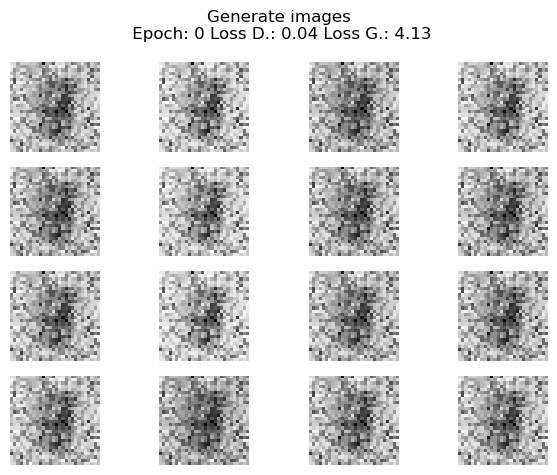

In [ ]:
train_gan(batch_size=64, num_epochs=100)

# Unit Test

Creating a unit test for the **`Generator`** and **`Discriminator`** classes of a GAN involves verifying that these models perform as expected under controlled conditions. This includes checking that the models accept input tensors of the correct shape and produce outputs of the expected shape. Since these classes are components of a GAN architecture, the tests will focus on the input and output dimensions, ensuring they align with the specifications.

- **Generator Test**: This test checks if the **`Generator`** class, when given a batch of random noise vectors (size **`[batch_size, noise_dimension]`**), produces a batch of images with the expected dimensions (**`[batch_size, channels, height, width]`**). In this case, the expected output dimension for MNIST generated images is **`[16, 1, 28, 28]`**.
- **Discriminator Test**: This test verifies that the **`Discriminator`** class, when presented with a batch of images (fake or real), outputs a batch of predictions with the correct shape (**`[batch_size, 1]`**). Each prediction is expected to represent the probability that a given image is real.

In [21]:
class TestGANComponents(unittest.TestCase):
    """Unit tests for the GAN's Generator and Discriminator components."""

    def test_generator_output_shape(self):
        """Test that the Generator produces output of the expected shape."""
        # Instantiate the generator
        generator = Generator()
        
        # Generate random noise as input to the generator
        random_noise = torch.randn(16, 100)  # Batch size of 16, noise dimension of 100
        
        # Generate images
        generated_images = generator(random_noise)
        
        # Check the shape of the generated images
        expected_shape = (16, 1, 28, 28)  # Expected shape (B, C, H, W)
        self.assertEqual(generated_images.shape, expected_shape, "Generator output shape is incorrect.")

    def test_discriminator_output_shape(self):
        """Test that the Discriminator produces output of the expected shape."""
        # Instantiate the discriminator
        discriminator = Discriminator()
        
        # Generate a batch of fake images (assuming square images for simplicity)
        fake_images = torch.randn(16, 1, 28, 28)  # Batch size of 16, 1 channel, 28x28 images
        
        # Pass the fake images through the discriminator
        predictions = discriminator(fake_images)
        
        # Check the shape of the discriminator output
        expected_shape = (16, 1)  # Expected shape (B, Out)
        self.assertEqual(predictions.shape, expected_shape, "Discriminator output shape is incorrect.")


In [27]:
# This enables running the tests from the command line
if __name__ == '__main__':
    unittest.main(argv=['', 'TestGANComponents'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.043s

OK
